In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
df_sus = pd.read_csv('/content/drive/MyDrive/PoseToCode - Top Level Folder/DataAnalysis/export_p2c_sus_scores.csv')
print(df_sus)

                                  STUID   SUS
0  608a5071-8f17-4d99-94d2-cdcdd7eb1ed8  67.5
1  89af11e6-059c-418f-bc21-c9a9e860cca1  62.5
2  baf43b82-3f54-464e-bcf5-c65f0edfa399  22.5
3  5968be26-2a85-4e6f-b9ad-0a8a2f3dfe80  27.5
4  c1817e21-3407-4238-8a59-71812399cb2c  40.0
5  c4d38e42-b1be-43b2-bee5-1d5c112a28f0  72.5
6  533cfc55-eb89-4d1b-8eb8-4462bb255f0b  80.0
7  a7e3dbc8-e668-4be4-961d-7133d44bf4c1  60.0
8  68617cd1-033a-410a-a648-16adb54625fb  65.0
9  8441e903-5dac-4f1d-8856-dac3a3a58a46  65.0


In [4]:

import json
from pandas.io.json import json_normalize
import os

directory = '/content/drive/MyDrive/PoseToCode - Top Level Folder/RealWorldStudyData/CleanJSON/'
df_time_on_task = pd.DataFrame(columns=['STUID', 'Time'])

for filename in os.listdir(directory):
    STUID = (filename.partition('_'))[0]
    # print(STUID)
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        df = pd.read_json(f)
        cols = df.columns.values.tolist()
        if len(cols) != 0:
          t1 = pd.to_datetime(cols[0])
          t2 = pd.to_datetime(cols[len(cols)-1])
          # print(str(pd.Timedelta(t2 - t1).seconds / 60) + " min")
          # df_time_on_task.append([STUID, (pd.Timedelta(t2 - t1).seconds / 60)])
          df1 = pd.DataFrame([[STUID, (pd.Timedelta(t2 - t1).seconds / 60)]], columns=['STUID','Time'])
          df_time_on_task = pd.concat([df1, df_time_on_task], ignore_index=True)
        else:
          # print("0 min")
          df1 = pd.DataFrame([[STUID, 0]], columns=['STUID','Time'])
          df_time_on_task = pd.concat([df1, df_time_on_task], ignore_index=True)

print(df_time_on_task)


                                   STUID       Time
0   6416d284-6ab2-450c-876e-342fbfc967a1   9.583333
1   f301182b-a02b-4876-8cbb-219dbf3a8f8a   9.233333
2   8441e903-5dac-4f1d-8856-dac3a3a58a46   9.100000
3   6e2f30c4-3f45-49df-8ecf-598320399d5c   8.883333
4   e0641e72-303c-45a7-ba1a-50dca54e2d30  15.600000
5   f10cb896-58b9-4f28-b267-c42323682ade   9.450000
6   e0641e72-303c-45a7-ba1a-50dca54e2d30   0.000000
7   a7e3dbc8-e668-4be4-961d-7133d44bf4c1   8.633333
8   e0641e72-303c-45a7-ba1a-50dca54e2d30   1.716667
9   89af11e6-059c-418f-bc21-c9a9e860cca1   9.066667
10  c4d38e42-b1be-43b2-bee5-1d5c112a28f0   7.916667
11  5968be26-2a85-4e6f-b9ad-0a8a2f3dfe80   8.733333
12  d4071899-be28-45a9-9e29-697f5fde7a37   8.766667
13  d1134907-a8b6-4eb3-8d77-9a926c59950e   8.350000
14  baf43b82-3f54-464e-bcf5-c65f0edfa399   9.066667
15  c1817e21-3407-4238-8a59-71812399cb2c   9.183333
16  608a5071-8f17-4d99-94d2-cdcdd7eb1ed8   5.700000
17  0d6aa221-f0f2-4405-832c-1b3b1cd4ec75   9.483333
18  68617cd1

In [5]:
df = df_sus.merge(df_time_on_task, left_on=["STUID"], right_on=["STUID"], how='inner')
print(df)

                                   STUID   SUS      Time
0   608a5071-8f17-4d99-94d2-cdcdd7eb1ed8  67.5  5.700000
1   89af11e6-059c-418f-bc21-c9a9e860cca1  62.5  9.066667
2   baf43b82-3f54-464e-bcf5-c65f0edfa399  22.5  9.066667
3   5968be26-2a85-4e6f-b9ad-0a8a2f3dfe80  27.5  8.733333
4   c1817e21-3407-4238-8a59-71812399cb2c  40.0  9.183333
5   c4d38e42-b1be-43b2-bee5-1d5c112a28f0  72.5  7.916667
6   c4d38e42-b1be-43b2-bee5-1d5c112a28f0  72.5  1.133333
7   533cfc55-eb89-4d1b-8eb8-4462bb255f0b  80.0  8.533333
8   a7e3dbc8-e668-4be4-961d-7133d44bf4c1  60.0  8.633333
9   68617cd1-033a-410a-a648-16adb54625fb  65.0  9.166667
10  8441e903-5dac-4f1d-8856-dac3a3a58a46  65.0  9.100000


SUS: mean=57.727 stdv=18.168
Time: mean=7.839 stdv=2.328


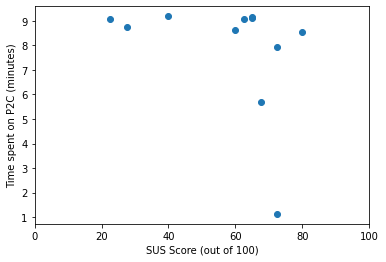

Covariance
[[363.06818182 -17.09734848]
 [-17.09734848   5.9634596 ]]
Pearsons correlation: -0.367


In [9]:
from numpy import mean
from numpy import cov
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import pearsonr

# summarize
print('SUS: mean=%.3f stdv=%.3f' % (mean(df["SUS"]), std(df["SUS"])))
print('Time: mean=%.3f stdv=%.3f' % (mean(df["Time"]), std(df["Time"])))
# plot
pyplot.scatter(df["SUS"], df["Time"])
pyplot.xlabel("SUS Score (out of 100)")
pyplot.ylabel("Time spent on P2C (minutes)")
pyplot.xlim(0, 100)
pyplot.show()

# calculate covariance matrix
covariance = cov(df["SUS"], df["Time"])
print("Covariance")
print(covariance)

# pearson r
corr, _ = pearsonr(df["SUS"], df["Time"])
print('Pearsons correlation: %.3f' % corr)

In [18]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import os
import numpy as np

directory = '/content/drive/MyDrive/PoseToCode - Top Level Folder/RealWorldStudyData/CleanJSON/'
df_num_blocks = pd.DataFrame(columns=['STUID', 'NumBlocks'])

for filename in os.listdir(directory):
    STUID = (filename.partition('_'))[0]
    # print(STUID)
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        df = pd.read_json(f)
        if len(df) != 0:
        #print(df)
          np_array = df.iloc[0].to_numpy()
          # x = x[x != 'nan']

          np_array = [x for x in np_array if str(x) != 'nan']
          np_array = [x for x in np_array if str(x) != 'Reset']
          np_array = [x for x in np_array if str(x) != 'RunCode']

          res = []
          for i in np_array:
              if i not in res:
                  res.append(i)

          df1 = pd.DataFrame([[STUID, len(res)]], columns=['STUID','NumBlocks'])
          df_num_blocks = pd.concat([df1, df_num_blocks], ignore_index=True)
          
print(df_num_blocks)
df = df_sus.merge(df_num_blocks, left_on=["STUID"], right_on=["STUID"], how='inner')
print(df)


                                   STUID NumBlocks
0   6416d284-6ab2-450c-876e-342fbfc967a1         8
1   f301182b-a02b-4876-8cbb-219dbf3a8f8a         4
2   8441e903-5dac-4f1d-8856-dac3a3a58a46        12
3   6e2f30c4-3f45-49df-8ecf-598320399d5c         8
4   e0641e72-303c-45a7-ba1a-50dca54e2d30        12
5   f10cb896-58b9-4f28-b267-c42323682ade         7
6   a7e3dbc8-e668-4be4-961d-7133d44bf4c1         4
7   e0641e72-303c-45a7-ba1a-50dca54e2d30         4
8   89af11e6-059c-418f-bc21-c9a9e860cca1         8
9   c4d38e42-b1be-43b2-bee5-1d5c112a28f0        12
10  5968be26-2a85-4e6f-b9ad-0a8a2f3dfe80        12
11  d4071899-be28-45a9-9e29-697f5fde7a37        12
12  d1134907-a8b6-4eb3-8d77-9a926c59950e         7
13  baf43b82-3f54-464e-bcf5-c65f0edfa399         4
14  c1817e21-3407-4238-8a59-71812399cb2c        12
15  608a5071-8f17-4d99-94d2-cdcdd7eb1ed8         4
16  0d6aa221-f0f2-4405-832c-1b3b1cd4ec75         4
17  68617cd1-033a-410a-a648-16adb54625fb         4
18  c4d38e42-b1be-43b2-bee5-1d5

SUS: mean=57.727 stdv=18.168
Time: mean=7.273 stdv=3.744


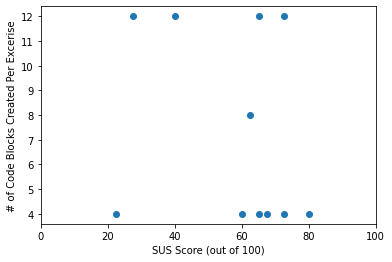

Pearsons correlation: -0.252


In [20]:
from numpy import mean
from numpy import cov
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import pearsonr

# summarize
print('SUS: mean=%.3f stdv=%.3f' % (mean(df["SUS"]), std(df["SUS"])))
print('Time: mean=%.3f stdv=%.3f' % (mean(df["NumBlocks"]), std(df["NumBlocks"])))
# plot
pyplot.scatter(df["SUS"], df["NumBlocks"])
pyplot.xlabel("SUS Score (out of 100)")
pyplot.ylabel("# of Code Blocks Created Per Excerise")
pyplot.xlim(0, 100)
pyplot.show()

# calculate covariance matrix
# covariance = cov(df["SUS"], df["NumBlocks"])
# print("Covariance")
# print(covariance)

# pearson r
corr, _ = pearsonr(df["SUS"], df["NumBlocks"])
print('Pearsons correlation: %.3f' % corr)

In [15]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import os
import numpy as np

directory = '/content/drive/MyDrive/PoseToCode - Top Level Folder/RealWorldStudyData/CleanJSON/'
df_exercises = pd.DataFrame(columns=['STUID', 'CompletedExercises'])

for filename in os.listdir(directory):
    STUID = (filename.partition('_'))[0]
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        df = pd.read_json(f)
        if len(df) == 4:
           np_array = df.iloc[3].to_numpy()
           np_array = [x for x in np_array if str(x) != 'nan']
           df1 = pd.DataFrame([[STUID, len(np_array)]], columns=['STUID','CompletedExercises'])
           df_exercises = pd.concat([df1, df_exercises], ignore_index=True)
        else:
          df1 = pd.DataFrame([[STUID, 0]], columns=['STUID','CompletedExercises'])
          df_exercises = pd.concat([df1, df_exercises], ignore_index=True)
          
print(df_exercises)
df = df_sus.merge(df_exercises, left_on=["STUID"], right_on=["STUID"], how='inner')
print(df)


                                   STUID CompletedExercises
0   6416d284-6ab2-450c-876e-342fbfc967a1                  1
1   f301182b-a02b-4876-8cbb-219dbf3a8f8a                  0
2   8441e903-5dac-4f1d-8856-dac3a3a58a46                  2
3   6e2f30c4-3f45-49df-8ecf-598320399d5c                  1
4   e0641e72-303c-45a7-ba1a-50dca54e2d30                  3
5   f10cb896-58b9-4f28-b267-c42323682ade                  1
6   e0641e72-303c-45a7-ba1a-50dca54e2d30                  0
7   a7e3dbc8-e668-4be4-961d-7133d44bf4c1                  0
8   e0641e72-303c-45a7-ba1a-50dca54e2d30                  0
9   89af11e6-059c-418f-bc21-c9a9e860cca1                  1
10  c4d38e42-b1be-43b2-bee5-1d5c112a28f0                  3
11  5968be26-2a85-4e6f-b9ad-0a8a2f3dfe80                  2
12  d4071899-be28-45a9-9e29-697f5fde7a37                  2
13  d1134907-a8b6-4eb3-8d77-9a926c59950e                  1
14  baf43b82-3f54-464e-bcf5-c65f0edfa399                  0
15  c1817e21-3407-4238-8a59-71812399cb2c

SUS: mean=57.727 stdv=18.168
Time: mean=0.909 stdv=1.083


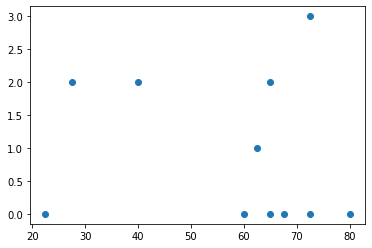

Pearsons correlation: -0.149


In [16]:
from numpy import mean
from numpy import cov
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
from scipy.stats import pearsonr

# summarize
print('SUS: mean=%.3f stdv=%.3f' % (mean(df["SUS"]), std(df["SUS"])))
print('Time: mean=%.3f stdv=%.3f' % (mean(df["CompletedExercises"]), std(df["CompletedExercises"])))
# plot
pyplot.scatter(df["SUS"], df["CompletedExercises"])
pyplot.show()

# calculate covariance matrix
# covariance = cov(df["SUS"], df["CompletedExercises"])
# print("Covariance")
# print(covariance)

# pearson r
corr, _ = pearsonr(df["SUS"], df["CompletedExercises"])
print('Pearsons correlation: %.3f' % corr)